## 데이터 EDA

### 사용자 출석 빈도

In [ ]:
# 사용자 출석 빈도
v_acc_atd['attendance_date'] = pd.to_datetime(v_acc_atd['attendance_date'])

user_attendance_frequency = v_acc_atd['user_id'].value_counts().reset_index()
user_attendance_frequency.columns = ['user_id', 'attendance_count']

attendance_trends = v_acc_atd['attendance_date'].value_counts().reset_index()
attendance_trends.columns = ['attendance_date', 'user_count']
attendance_trends = attendance_trends.sort_values(by='attendance_date')

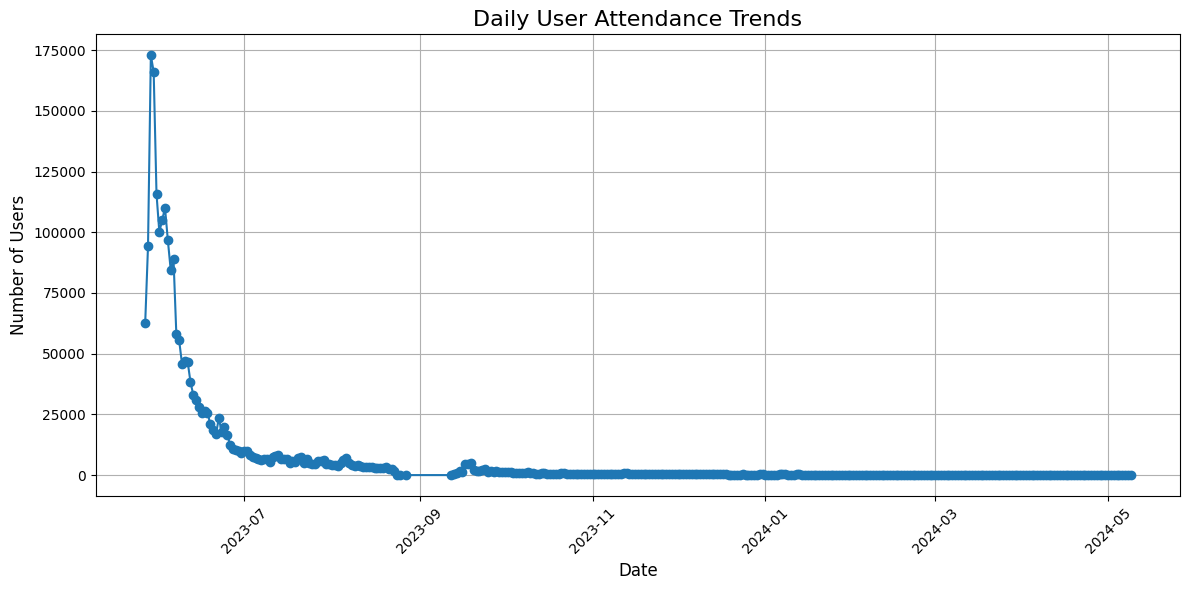

In [ ]:
# 출석 경향 시각화
# 일별 유저 출석 경향 그래프
plt.figure(figsize=(12, 6))
plt.plot(attendance_trends['attendance_date'], attendance_trends['user_count'])  # 날짜별 출석 유저 수
plt.title('Daily User Attendance Trends', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


### 날짜별 결제횟수 분포

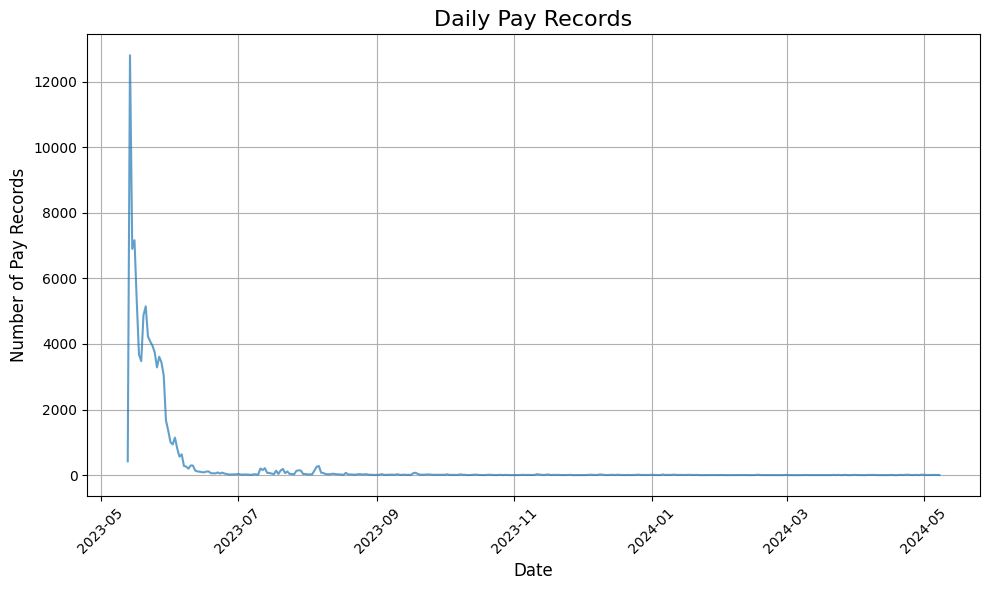

In [ ]:
# 결제가 발생한 시간을 datetime 형식으로 변환
v_acc_pay['created_at'] = pd.to_datetime(v_acc_pay['created_at'])

# 날짜별 결제 수량 계산
daily_pay_counts = v_acc_pay['created_at'].dt.date.value_counts().sort_index()


# 날짜별 결제 트렌드 시각화
plt.figure(figsize=(10, 6))
plt.plot(daily_pay_counts.index, daily_pay_counts.values, alpha=0.7)
plt.title('Daily Pay Records', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Pay Records', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

### 날짜별 계정 생성 분포

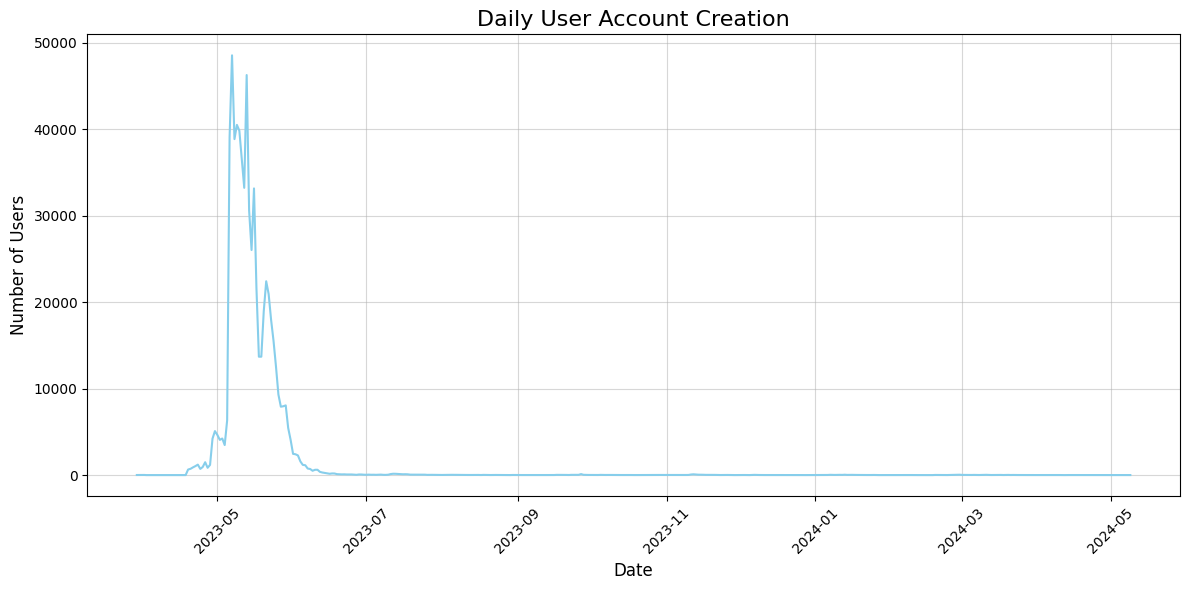

In [ ]:
vau_df = v_acc_user.copy()

# `created_at`를 datetime 형식으로 변환
vau_df['created_at'] = pd.to_datetime(vau_df['created_at'])

# 날짜만 추출하여 created_date 생성
vau_df['created_date'] = vau_df['created_at'].dt.date

# 날짜별로 계정 생성 수 집계
daily_counts = vau_df['created_date'].value_counts().sort_index()

# 시각화 (일별 데이터)
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, linestyle='-', color='skyblue')
plt.title('Daily User Account Creation', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

### 시간별, 요일별 투표 횟수 분포

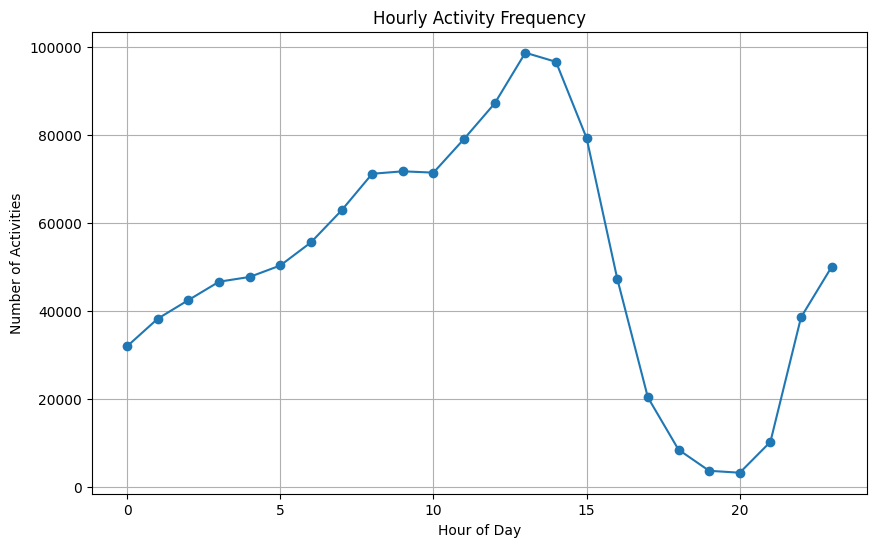

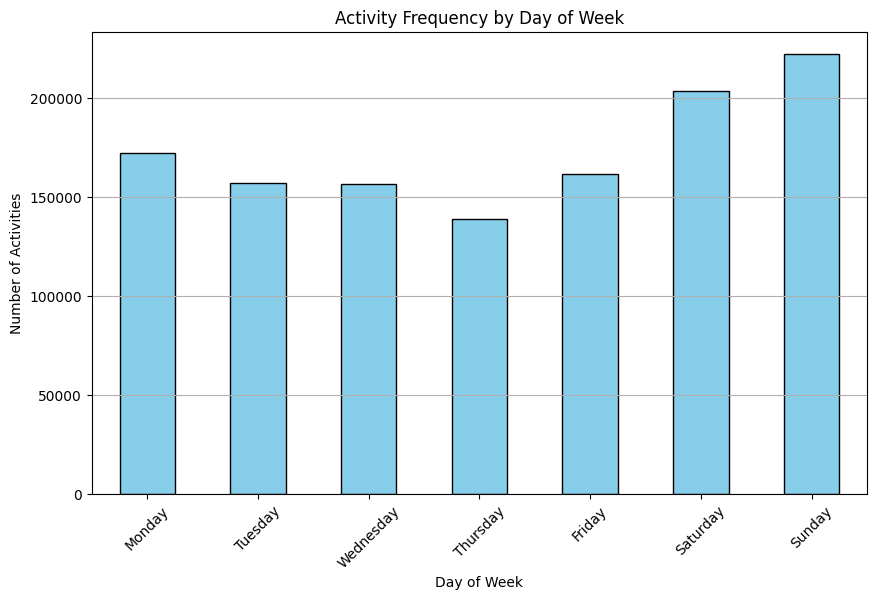

In [ ]:
uqrec = v_acc_uqrec.copy()

uqrec['created_at'] = pd.to_datetime(uqrec['created_at'])

# 시간과 요일 추출
uqrec['hour'] = uqrec['created_at'].dt.hour
uqrec['day_of_week'] = uqrec['created_at'].dt.day_name()

# 시간별 투표 횟수
hourly_activity = uqrec['hour'].value_counts().sort_index()

# 시간별 투표 횟수 분포 시각화
plt.figure(figsize=(10, 6))
plt.plot(hourly_activity.index, hourly_activity.values, marker='o')
plt.title('Hourly Activity Frequency')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Activities')
plt.grid()
plt.show()

# 요일별 투표 횟수
day_of_week_activity = uqrec['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# 요일별 투표 횟수 분포 시각화
plt.figure(figsize=(10, 6))
day_of_week_activity.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Activity Frequency by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Activities')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### 날짜별 사용자 탈퇴 분포

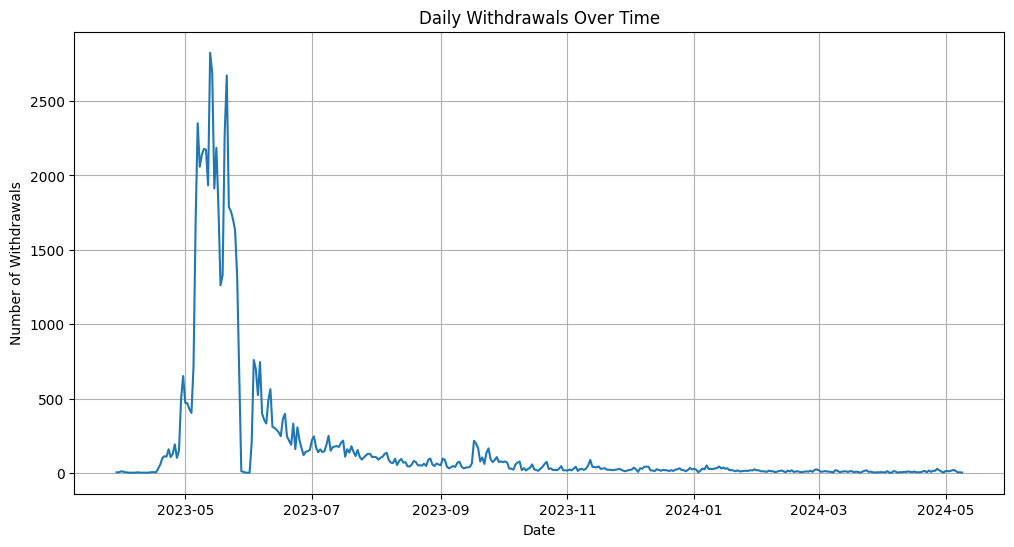

In [ ]:
uwd = v_acc_uwd.copy()

uwd['created_at'] = pd.to_datetime(uwd['created_at'])

# 날짜와 시간 추출
uwd['date'] = uwd['created_at'].dt.date
uwd['hour'] = uwd['created_at'].dt.hour

# 날짜 탈퇴 분포
daily_withdrawals = uwd['date'].value_counts().sort_index()

# 일별 탈퇴 분포 시각화
plt.figure(figsize=(12, 6))
daily_withdrawals.plot(kind='line')
plt.title('Daily Withdrawals Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Withdrawals')
plt.grid()
plt.show()

### 탈퇴 사유 시간대별 분포

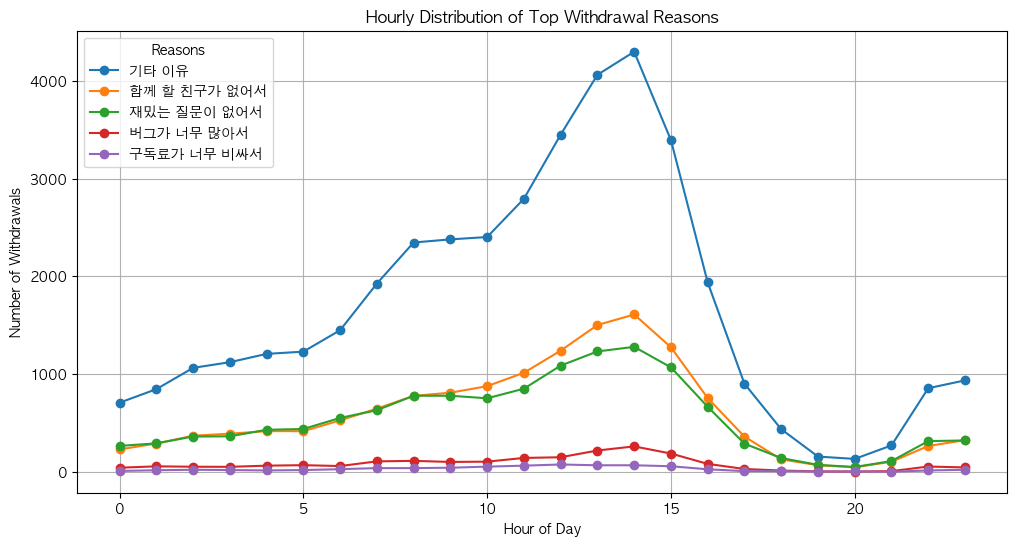

In [ ]:
#  시간별 이유 횟수 그룹화하여 시간대별 이유 횟수 생성
hourly_reason_counts = uwd.groupby(['hour', 'reason']).size().unstack(fill_value=0)
withdraw_reason_counts = v_acc_uwd['reason'].value_counts()

# 시간대별 이유 분포 시각화
top_reasons = withdraw_reason_counts.head(5).index
hourly_reason_counts[top_reasons].plot(kind='line', figsize=(12, 6), marker='o')

plt.title('Hourly Distribution of Top Withdrawal Reasons')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Withdrawals')
plt.legend(title='Reasons', loc='upper left')
plt.grid()
plt.show()